In [53]:
#Q1: Which countries are most users based in?

#Q2: Do more likes, subscribers, and comments lead to more views for a video?

#Q3: Which videos led to higher subscriber count?

#Q4: What are the most common keywords used in video titles?

In [54]:
#Import essential ibraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.getcwd()

'/Users/kioshi/Desktop/Me/Python/Projects/ken_jee_youtube_data'

In [55]:
#Load 4 individual csv files
df_agg_country_subs = pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
df_agg_vid_metrics = pd.read_csv('Aggregated_Metrics_By_Video.csv')
df_all_comm = pd.read_csv('All_Comments_Final.csv')
df_vid_perf_ovt = pd.read_csv('Video_Performance_Over_Time.csv')

In [56]:
#Lets do an EDA on 'df_agg_country_subs' to try to answer Q1
#Check data
df_agg_country_subs

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55287,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MM,False,1,0,0,0,0,0,0.622642,33.000000,0
55288,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,SA,True,14,1,0,0,0,0,0.515569,27.325143,0
55289,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,DZ,False,2,0,0,0,0,0,0.782075,41.450000,0
55290,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MX,False,11,0,0,0,0,0,0.636178,33.717455,0


In [57]:
#Rename columns to lower case & underscore to make it easier to code
rename = {'Video Title':'video_title', 'External Video ID':'external_video_id', 'Video Length':'video_length', 
          'Thumbnail link':'thumbnail_link', 'Country Code':'country_code', 'Is Subscribed':'is_subscribed', 'Views':'views', 
          'Video Likes Added':'video_likes_added', 'Video Dislikes Added':'video_dislikes_added', 'Video Likes Removed':'video_likes_removed', 
         'User Subscriptions Added':'user_subscriptions_added', 'User Subscriptions Removed':'user_subscriptions_removed', 
         'Average View Percentage':'average_view_percentage', 'Average Watch Time':'average_watch_time', 'User Comments Added':'user_comments_added'}
df_agg_country_subs = df_agg_country_subs.rename(columns=rename)
df_agg_country_subs

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55287,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MM,False,1,0,0,0,0,0,0.622642,33.000000,0
55288,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,SA,True,14,1,0,0,0,0,0.515569,27.325143,0
55289,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,DZ,False,2,0,0,0,0,0,0.782075,41.450000,0
55290,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MX,False,11,0,0,0,0,0,0.636178,33.717455,0


In [58]:
#Check data types
df_agg_country_subs.dtypes

video_title                    object
external_video_id              object
video_length                    int64
thumbnail_link                 object
country_code                   object
is_subscribed                    bool
views                           int64
video_likes_added               int64
video_dislikes_added            int64
video_likes_removed             int64
user_subscriptions_added        int64
user_subscriptions_removed      int64
average_view_percentage       float64
average_watch_time            float64
user_comments_added             int64
dtype: object

In [59]:
#Get description of each column
df_agg_country_subs.describe()

,video_length,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
count,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,53854.000000,53854.000000,55292.0
mean,896.678073,100.573157,4.239311,0.106055,0.175577,2.365279,0.053389,0.347821,205.297156,0.0
std,927.380801,1704.966002,65.291451,2.507351,3.601171,65.889539,0.766945,0.259734,206.542106,0.0
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,375.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145948,85.442891,0.0
50%,545.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320983,170.139725,0.0
75%,934.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.486153,259.449958,0.0
max,5029.000000,285593.000000,9165.000000,399.000000,436.000000,9599.000000,103.000000,4.967797,5027.660000,0.0


In [60]:
#Find Null values
df_agg_country_subs.isnull().sum()

video_title                      0
external_video_id                0
video_length                     0
thumbnail_link                   0
country_code                   386
is_subscribed                    0
views                            0
video_likes_added                0
video_dislikes_added             0
video_likes_removed              0
user_subscriptions_added         0
user_subscriptions_removed       0
average_view_percentage       1438
average_watch_time            1438
user_comments_added              0
dtype: int64

In [61]:
#Display and analyze Null values in detail
df_null = df_agg_country_subs[df_agg_country_subs.isnull().any(axis=1)]
df_null

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
103,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,NaN,True,1,0,0,0,0,0,0.071864,4.24,0
183,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,PR,False,0,0,0,0,0,0,NaN,NaN,0
193,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,NaN,False,0,0,0,0,0,0,NaN,NaN,0
211,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,EE,False,0,0,0,0,0,0,NaN,NaN,0
264,git for Data Science Made Simple... (Hopefully),_0rHU6qAQe0,392,https://i.ytimg.com/vi/_0rHU6qAQe0/hqdefault.jpg,ME,False,0,0,0,0,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55150,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,NO,False,0,0,0,0,0,0,NaN,NaN,0
55178,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,KG,False,0,0,0,0,0,0,NaN,NaN,0
55212,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,BE,False,0,0,0,0,0,0,NaN,NaN,0
55235,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,NaN,False,0,0,0,0,0,0,NaN,NaN,0


In [87]:
#Examining the null values, we see inconsistency where there's null for 'Country Code', but values for 'Average View Percentage' & 'Average Watch Time' and vice versa.

#To have valid insights, we will drop the row from 'df_agg_country_subs' if it has null values in all three columns mentioned above & create another df with null values from country code removed
df_notna = df_agg_country_subs.dropna(thresh=13)
df_notna.head(25)

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0
5,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ZZ,True,4,0,0,0,0,0,0.784517,46.286500,0
6,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,AR,True,30,3,0,0,0,0,0.671451,39.615600,0
7,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,BB,False,1,0,0,0,0,0,0.508475,30.000000,0
8,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,KZ,True,6,0,0,0,0,0,0.649322,38.310000,0
9,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,NP,False,12,0,0,0,0,0,0.389364,22.972500,0


In [63]:
#Quick Google search tells us 'ZZ' is unknown_unspecified country' and XK is for the country 'Sao Tome and Principe'

#Drop ZZ from 'country_code' column
df_notna = df_notna.drop(df_notna[df_notna['country_code'] == 'ZZ'].index)
df_notna

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55287,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MM,False,1,0,0,0,0,0,0.622642,33.000000,0
55288,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,SA,True,14,1,0,0,0,0,0.515569,27.325143,0
55289,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,DZ,False,2,0,0,0,0,0,0.782075,41.450000,0
55290,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MX,False,11,0,0,0,0,0,0.636178,33.717455,0


In [64]:
df_notna_country = df_agg_country_subs.dropna(subset=['country_code'])
df_notna_country

,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55287,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MM,False,1,0,0,0,0,0,0.622642,33.000000,0
55288,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,SA,True,14,1,0,0,0,0,0.515569,27.325143,0
55289,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,DZ,False,2,0,0,0,0,0,0.782075,41.450000,0
55290,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MX,False,11,0,0,0,0,0,0.636178,33.717455,0


In [65]:
#Verify null values decreased
df_notna.isnull().sum()

video_title                      0
external_video_id                0
video_length                     0
thumbnail_link                   0
country_code                   196
is_subscribed                    0
views                            0
video_likes_added                0
video_dislikes_added             0
video_likes_removed              0
user_subscriptions_added         0
user_subscriptions_removed       0
average_view_percentage       1245
average_watch_time            1245
user_comments_added              0
dtype: int64

In [66]:
#Verify no null values in 'Country Code' column
df_notna_country.isnull().sum()

video_title                      0
external_video_id                0
video_length                     0
thumbnail_link                   0
country_code                     0
is_subscribed                    0
views                            0
video_likes_added                0
video_dislikes_added             0
video_likes_removed              0
user_subscriptions_added         0
user_subscriptions_removed       0
average_view_percentage       1248
average_watch_time            1248
user_comments_added              0
dtype: int64

In [67]:
#Retrieve country names from country abbreviations in 'country_code' column using pycountry library

#Import pycountry
import pycountry

#Define country names 
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]

def c_names(df_notna_country):
    if (len(df_notna_country['country_code'])==2 and df_notna_country['country_code'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df_notna_country['country_code']).name
    elif (len(df_notna_country['country_code'])==3 and df_notna_country['country_code'] in list_alpha_3):
        return pycountry.countries.get(alpha_3=df_notna_country['country_code']).name
    else:
        return 'Invalid Code'

#Put back into df_notna_country
df_notna_country['country_name'] = df_notna_country.apply(c_names, axis=1)
df_notna_country.head(25)

/var/folders/y8/3yf_22bs15n8ztp6_klc90w00000gn/T/ipykernel_955/298109390.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notna_country['country_name'] = df_notna_country.apply(c_names, axis=1)


,video_title,external_video_id,video_length,thumbnail_link,country_code,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added,country_name
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0,Hong Kong
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0,Montenegro
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0,Rwanda
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0,United States
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0,Germany
5,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ZZ,True,4,0,0,0,0,0,0.784517,46.286500,0,Invalid Code
6,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,AR,True,30,3,0,0,0,0,0.671451,39.615600,0,Argentina
7,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,BB,False,1,0,0,0,0,0,0.508475,30.000000,0,Barbados
8,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,KZ,True,6,0,0,0,0,0,0.649322,38.310000,0,Kazakhstan
9,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,NP,False,12,0,0,0,0,0,0.389364,22.972500,0,Nepal


In [68]:
#Drop 'country_code' column and place 'country_name' in its place
df_country_names = df_notna_country.drop(['country_code'], axis=1)

country_short_name = df_country_names[['video_title', 'external_video_id', 'video_length', 'thumbnail_link', 'country_name', 
                                 'is_subscribed', 'views', 'video_likes_added', 'video_dislikes_added', 'video_likes_removed', 
                                 'user_subscriptions_added', 'user_subscriptions_removed', 'average_view_percentage', 
                                 'average_watch_time', 'user_comments_added']]
country_short_name.head(25)

,video_title,external_video_id,video_length,thumbnail_link,country_name,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Hong Kong,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Montenegro,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Rwanda,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,United States,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Germany,False,75,3,0,1,0,0,0.661515,39.029373,0
5,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Invalid Code,True,4,0,0,0,0,0,0.784517,46.286500,0
6,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Argentina,True,30,3,0,0,0,0,0.671451,39.615600,0
7,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Barbados,False,1,0,0,0,0,0,0.508475,30.000000,0
8,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Kazakhstan,True,6,0,0,0,0,0,0.649322,38.310000,0
9,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Nepal,False,12,0,0,0,0,0,0.389364,22.972500,0


In [69]:
#Remove Invalid Code from 'country_name' column as that can skew the data.
country_short_name = country_short_name[country_short_name['country_name'].str.contains('Invalid Code')==False ]
country_short_name.head(25)

,video_title,external_video_id,video_length,thumbnail_link,country_name,is_subscribed,views,video_likes_added,video_dislikes_added,video_likes_removed,user_subscriptions_added,user_subscriptions_removed,average_view_percentage,average_watch_time,user_comments_added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Hong Kong,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Montenegro,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Rwanda,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,United States,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Germany,False,75,3,0,1,0,0,0.661515,39.029373,0
6,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Argentina,True,30,3,0,0,0,0,0.671451,39.615600,0
7,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Barbados,False,1,0,0,0,0,0,0.508475,30.000000,0
8,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Kazakhstan,True,6,0,0,0,0,0,0.649322,38.310000,0
9,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Nepal,False,12,0,0,0,0,0,0.389364,22.972500,0
10,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,Albania,True,2,0,0,0,0,0,0.515254,30.400000,0


In [70]:
#Get count of 'country names' to determine which country had the highest users views and lowest views
df_country_views = country_short_name.groupby('country_name')['views'].count()
df_country_views.head(10)

country_name
Afghanistan            168
Albania                284
Algeria                417
American Samoa          10
Andorra                 97
Angola                 157
Anguilla                 6
Antigua and Barbuda     78
Argentina              439
Armenia                325
Name: views, dtype: int64

In [71]:
##Countries with highest view count
df_country_views.nsmallest(10)

country_name
Eritrea                             1
Falkland Islands (Malvinas)         1
Niue                                1
Saint Barthélemy                    1
Kiribati                            2
Bonaire, Sint Eustatius and Saba    3
Nauru                               3
Saint Pierre and Miquelon           3
Montserrat                          5
Anguilla                            6
Name: views, dtype: int64

In [72]:
#Countries with lowest view count
df_country_views.nlargest(10)

country_name
Australia         445
Germany           445
India             445
Netherlands       445
United Kingdom    445
United States     445
Brazil            444
Canada            444
France            444
Malaysia          444
Name: views, dtype: int64

In [73]:
#Plot top 8 countries contributing to high view count
grouped = country_short_name.groupby('country_name')['views'].sum()
top10 = grouped.nlargest(10)
top10 = top10.reset_index(name='total_views')
top10

,country_name,total_views
0,United States,1354450
1,India,1155510
2,United Kingdom,239177
3,Canada,222373
4,Germany,172165
5,Australia,116295
6,Brazil,114161
7,Indonesia,112500
8,France,78852
9,Singapore,75794


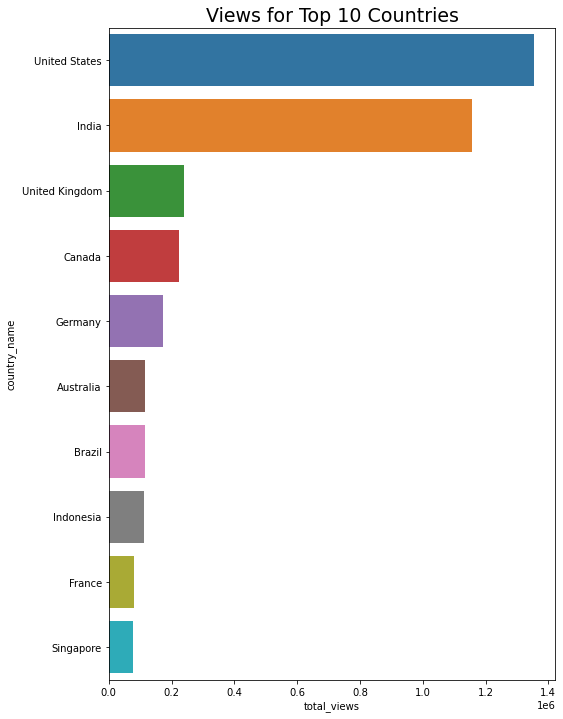

In [74]:
#Plot count of top10 countries
fig, ax = plt.subplots(figsize=(8,12))
ax = sns.barplot(x='total_views', y='country_name', data=top10)
plt.title('Views for Top 10 Countries', fontsize=19)
plt.show()
#Q1: Which countries are most users based in?

#Here we can see users are scattered throughout the world, but most users were based in the United States with Indian coming in second.

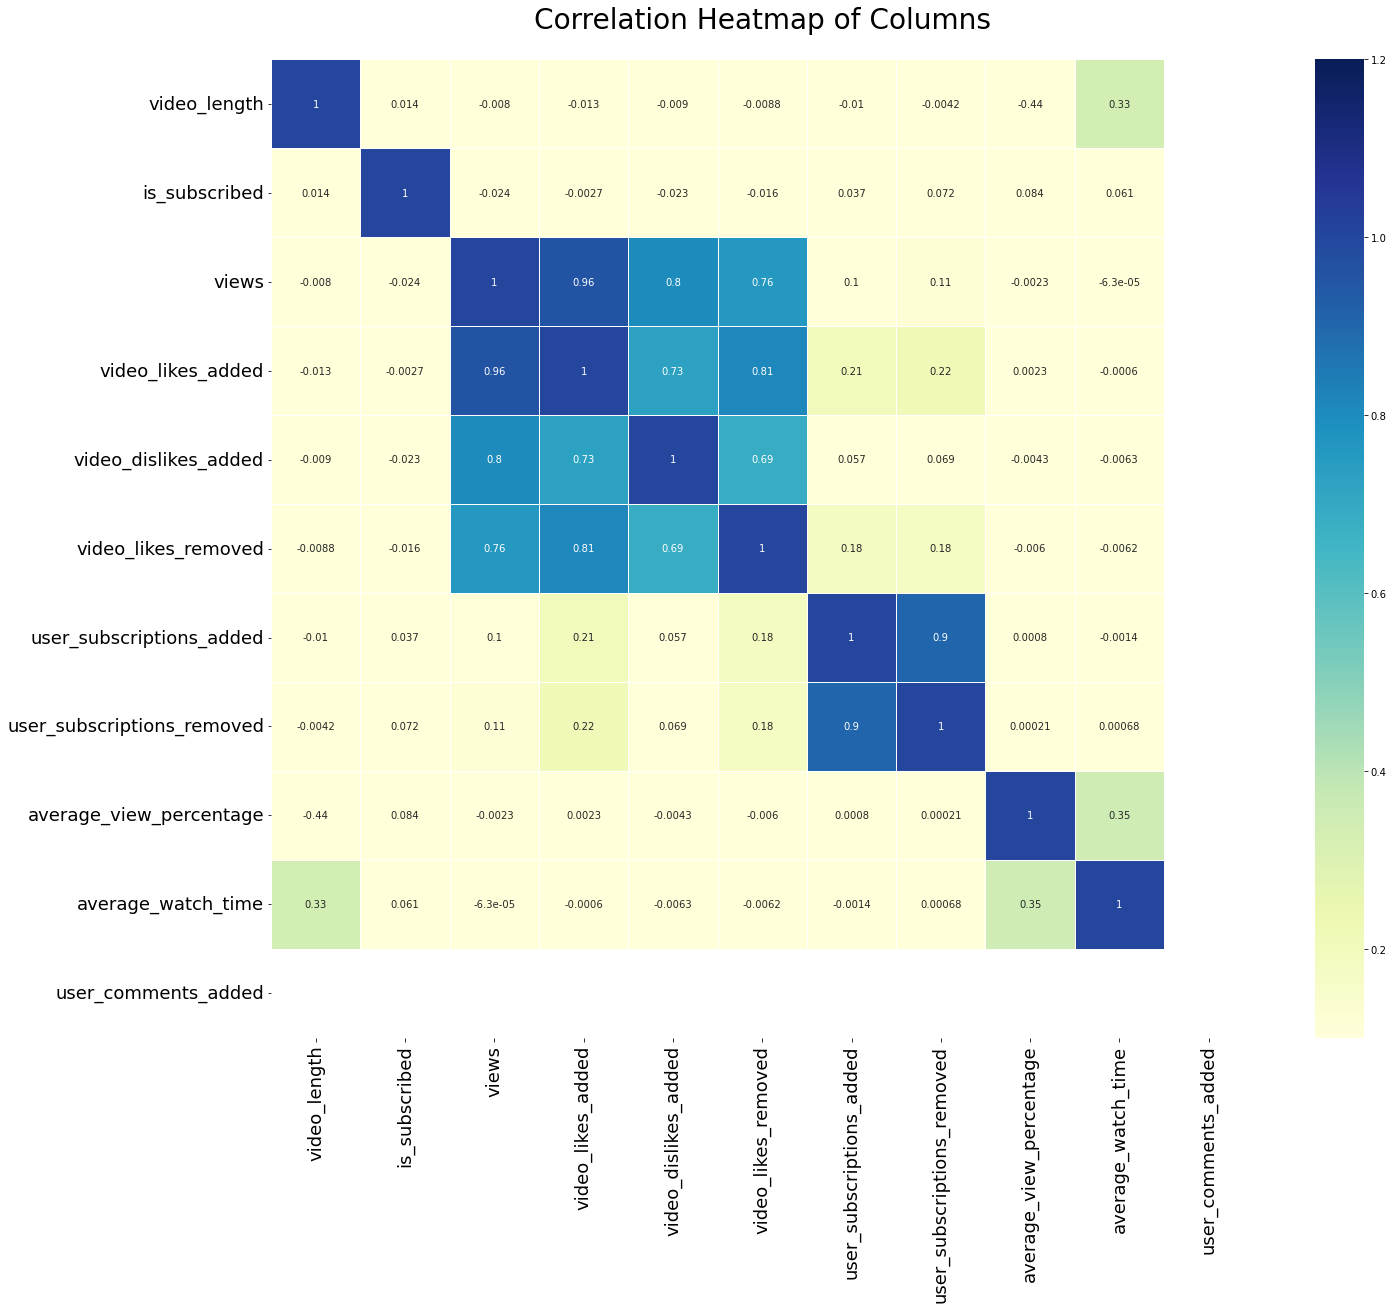

In [75]:
#On to answering Q2: Do more likes, subscribers, and comments lead to more views for a video?

#Now that we have the data cleaned, let's use a heatmap to find correlations for the above 3 and views
#Plot heatmap
plt.figure(figsize=(22, 18))
heatmap_corr = sns.heatmap(data=country_short_name.corr(), linewidth=0.5, vmin=0.1, vmax=1.2, cmap='YlGnBu', annot=True)
heatmap_corr.set_xticklabels(heatmap_corr.get_xmajorticklabels(), fontsize=18)
heatmap_corr.set_yticklabels(heatmap_corr.get_ymajorticklabels(), fontsize=18)
heatmap_corr.set_title('Correlation Heatmap of Columns', fontdict={'fontsize':28}, pad=31)
plt.show()

#Looking at the heatmap, we can clearly see 'views' has a strong correlation to 'video_likes_added', and 'video_dislikes_removed', with a somewhat correlation to 'video likes_removed'.
#Comments have zero correlation in this data set and subscriptions added/removed also have about 0.10% correlation to views.

In [86]:
#We will focus on which videos with 'video_likes added', 'video_dislikes_added', and 'video_likes_removed' led to more views.
more_views = country_short_name.groupby(['video_title', 'video_likes_added', 'video_dislikes_added', 
                                                       'video_likes_removed'])['views'].sum().sort_values(ascending=False).reset_index()
more_views.head(50)

,video_title,video_likes_added,video_dislikes_added,video_likes_removed,views
0,How I Would Learn Data Science (If I Had to St...,9165,399,327,285593
1,How I Would Learn Data Science (If I Had to St...,8442,170,436,203055
2,The Best Free Data Science Courses Nobody is T...,4386,51,237,70240
3,How I Would Learn Data Science (If I Had to St...,1589,38,61,49982
4,How I Would Learn Data Science (If I Had to St...,1318,38,37,44835
5,3 Proven Data Science Projects for Beginners (...,2629,32,121,43314
6,How I Would Learn Data Science (If I Had to St...,1216,54,42,42422
7,The Best Free Data Science Courses Nobody is T...,1917,13,67,35950
8,3 Proven Data Science Projects for Beginners (...,1680,11,77,33098
9,How I Would Learn Data Science (If I Had to St...,750,15,26,27263
